In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [1]:
!pip install xlrd
import xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 8.9 MB/s eta 0:00:00


In [80]:
datos_raw = pd.read_excel("vigilancia_kerma3Gy_macros.xls", sheet_name="Datos")
datos_raw.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,!! Enviar a Oscar solo los de Vascular,NaN,NaN,NaN,NaN,!! Cuando no esté cerrado el examen escribir e...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Vigilancia de kerma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Última fecha,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,PACS,Outlook,NaN,NaN,NaN,Eritrema en piel
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-07-31 00:00:00,---,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Tipo de paciente,Apellido 1,Apellido 2,Nombre,SIP,Fecha de la dosis,Kerma en aire acumulada (Gy),Zona corporal,...,Fecha de nacimiento,Apuntado,Examen,Nombre completo,Mes,Año,Equipo,Kerma acumulado (Gy),NaN,NaN
7,NaN,NaN,Adulto,Torregrosa,Valero,M Carmen,4245699,2018-01-15 00:00:00,3.159,NaN,...,1955-09-22 00:00:00,Si,NaN,"Torregrosa Valero,M Carmen",1,2018,Vascular,2.756,NaN,NaN
8,NaN,NaN,Adulto,Cervera,Ruiz,Antonio,2932082,2018-02-26 00:00:00,4.17,abdomen,...,1958-01-11 00:00:00,Si,Quimioembolización hepática. Procedimiento básico,"Cervera Ruiz,Antonio",2,2018,Vascular,10.417,NaN,NaN
9,NaN,NaN,Adulto,Giner,Ortega,Francisca,2932156,2018-06-11 00:00:00,2.9,abdomen,...,1958-12-29 00:00:00,Si,Quimioembolización hepática. Procedimiento básico,"Giner Ortega,Francisca",6,2018,Vascular,3.71127,NaN,NaN


In [81]:
datos_raw.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [82]:
datos_raw.rename(columns={'Unnamed: 2': 'Tipo',
                          'Unnamed: 3': 'Apellido 1',
                          'Unnamed: 4': 'Apellido 2',
                          'Unnamed: 5': 'Nombre',
                          'Unnamed: 6': 'SIP',
                          'Unnamed: 7': 'Fecha de dosis',
                          'Unnamed: 8': 'Kerma',
                          'Unnamed: 19': 'Fecha de nacimiento',
                          'Unnamed: 21': 'Examen',
                          'Unnamed: 25': 'Equipo',}, inplace=True)

In [83]:
datos_raw.drop(columns=['Unnamed: 0','Unnamed: 1','Unnamed: 9','Unnamed: 10',
                        'Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14',
                        'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18',
                        'Unnamed: 20','Unnamed: 22','Unnamed: 23','Unnamed: 24',
                        'Unnamed: 26','Unnamed: 27','Unnamed: 28'], inplace=True)

In [84]:
datos_raw.drop([0,1,2,3,4,5,6],inplace=True)

In [182]:
df = datos_raw

In [183]:
df[df['Examen']=='Cateterismo cardiaco']['Kerma']

1175    0.07443
1176     0.1356
1177    0.07326
1178    0.08627
1191    0.84342
         ...   
2429    0.49329
2431    1.34588
2432    0.53512
2433    0.78556
2434    0.29466
Name: Kerma, Length: 378, dtype: object

In [184]:
df['Kerma'].value_counts()

No tiene    9
0.4         3
0.00193     3
0.287       3
0.03        3
           ..
0.262       1
0.11385     1
0.78572     1
1.472       1
0.5         1
Name: Kerma, Length: 2267, dtype: int64

In [185]:
df = df.drop(df[df['Kerma']=='No tiene'].index)

In [186]:
df = df.drop(df[df['Kerma']=='Falta mirarlo. No acceso'].index)
df = df.drop(df[df['Kerma']=='Sin datos'].index)
df = df.drop(df[df['Kerma']=='No hay'].index)
df = df.drop(df[df['Kerma']=='Imposible'].index)
df = df.drop(df[df['Kerma']=='Imposible'].index)
df = df.drop(df[df['Kerma']=='NO'].index)
df = df.drop(df[df['Kerma']=='XA_02'].index)
df = df.drop(df[df['Kerma']=='XA_04'].index)
df = df.drop(df[df['Kerma']=='XA_05'].index)
df = df.drop(df[df['Kerma']=='XA_07'].index)

In [187]:
df.loc[[1877]]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
1877,Adulto,Fernandez,Lozano,Angeles,2147684,2022-06-07 00:00:00,07:15:59.328000,1966-05-26 00:00:00,Cateterismo cardiaco,Hemodinámica


In [188]:
df.drop(df.iloc[1857].name,inplace=True)

In [189]:
df['Kerma'] = df['Kerma'].astype(float)

In [190]:
df[df['Kerma'] == df['Kerma'].max()]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
917,Adulto,Martinez,Garcia,Carmen,2876248,2022-01-22 00:00:00,309957.0,1957-02-24 00:00:00,Otras arteriografias,Vascular


In [191]:
df.drop(df.loc[917].name,inplace=True)

In [192]:
df[df['Kerma'] == df['Kerma'].max()]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
1967,Pediátrico,Aguayo,Guiterrez,Josue,6671279,2022-06-15 00:00:00,139.48,2005-03-08 00:00:00,Cateterismo cardiaco,Hemodinámica


In [193]:
df.loc[1967,'Kerma'] = 0.13948

In [194]:
df.loc[353,'Kerma'] = 0.04871

In [195]:
df.loc[361,'Kerma'] = 0.02346

In [196]:
df.drop(df.loc[12].name,inplace=True)

In [197]:
df[df['Kerma'] == df['Kerma'].max()]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
45,Adulto,Nadal,Torralbo,David,4664774,2020-07-16 00:00:00,7.469,1970-07-14 00:00:00,Arteriografía troncos viscerales digestivos,Vascular


Text(0,0.5,'Frecuencia')

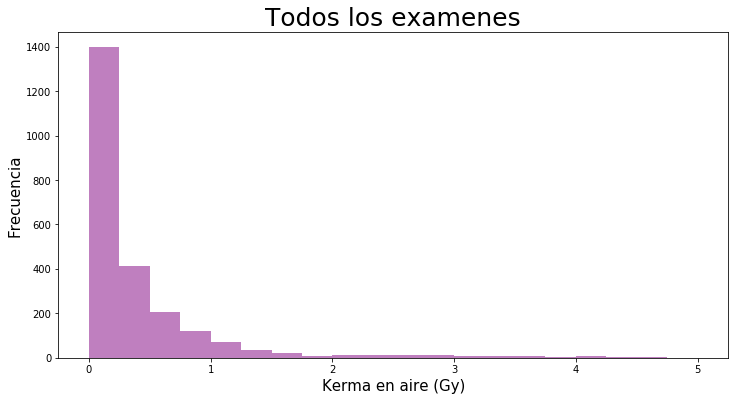

In [215]:
plt.figure(figsize=(12, 6))
plt.subplot(111)
plt.hist(df['Kerma'],color='purple', alpha=0.5, range=(0,5),bins=20)
plt.title('Todos los examenes',fontsize=25)
plt.xlabel('Kerma en aire (Gy)', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

In [201]:
df_cateterismo = df[df['Examen']=='Cateterismo cardiaco']

Text(0,0.5,'Frecuencia')

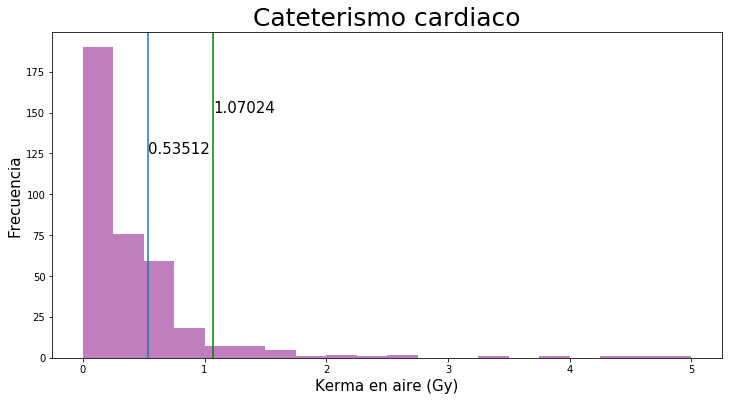

In [238]:
tercer_cuartil = df_cateterismo['Kerma'].quantile(0.75)

plt.figure(figsize=(12, 6))
plt.subplot(111)
plt.hist(df_cateterismo['Kerma'],color='purple', alpha=0.5, range=(0,5),bins=20)

plt.axvline(x=tercer_cuartil)
plt.annotate(tercer_cuartil, xy=(tercer_cuartil, 125),fontsize=15) 

plt.axvline(x=tercer_cuartil*2,color='green')
plt.annotate(tercer_cuartil*2, xy=(tercer_cuartil*2, 150),fontsize=15) 

plt.title('Cateterismo cardiaco',fontsize=25)
plt.xlabel('Kerma en aire (Gy)', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

In [247]:
len(df_cateterismo[df_cateterismo['Kerma']>tercer_cuartil*2])/len(df_cateterismo)*100

7.506702412868632